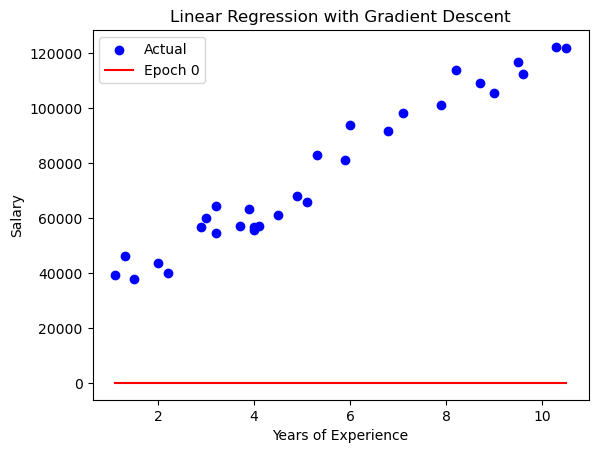

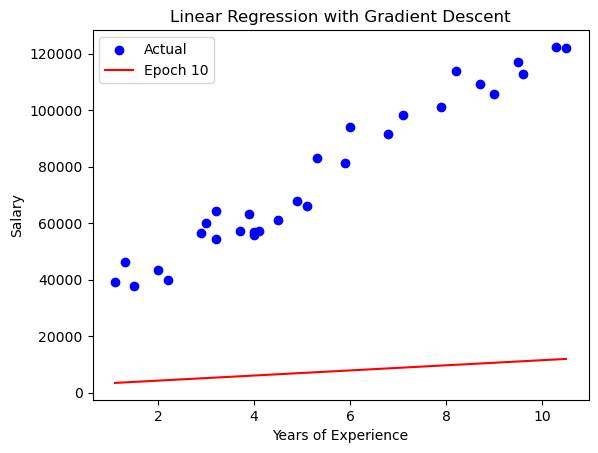

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('salary_data.csv')

# Extract feature (YearsExperience) and target (Salary)
X = df['YearsExperience'].values  # Feature
y = df['Salary'].values  # Target

# Normalize X for faster convergence
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std  # Standardization

# Add bias term (X0 = 1)
X = np.c_[np.ones(X.shape[0]), X]  # Shape (m, 2)

# Initialize parameters (theta0, theta1)
theta = np.zeros(2)

# Hyperparameters
learning_rate = 0.01
epochs = 100  # Number of iterations

# Number of training examples
m = len(y)

# Cost function history
cost_history = []

# Gradient Descent
for epoch in range(epochs):
    # Compute predictions
    y_pred = X.dot(theta)
    
    # Compute error
    error = y_pred - y
    
    # Compute gradients
    gradients = (1/m) * X.T.dot(error)
    
    # Update parameters
    theta -= learning_rate * gradients
    
    # Compute cost (Mean Squared Error)
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)
    
    # Plot regression line every 10 epochs
    if epoch % 10 == 0:
        plt.scatter(df['YearsExperience'], y, color='blue', label='Actual')
        plt.plot(df['YearsExperience'], y_pred, color='red', label=f'Epoch {epoch}')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.title('Linear Regression with Gradient Descent')
        plt.legend()
        plt.show()

# Final model predictions
y_pred_final = X.dot(theta)

# Compute R² Score
r2 = r2_score(y, y_pred_final)

print(f"Final Parameters: Theta0 = {theta[0]:.4f}, Theta1 = {theta[1]:.4f}")
print(f"Final R² Score: {r2:.4f}")

# Plot Cost Function Convergence
plt.plot(range(epochs), cost_history, color='green')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()
